Found 4116 images belonging to 18 classes.
Found 4116 images belonging to 18 classes.


C:\Users\Ronith\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.1484 - loss: 3.0322

C:\Users\Ronith\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 732ms/step - accuracy: 0.1489 - loss: 3.0282 - val_accuracy: 0.3850 - val_loss: 2.0007
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 847ms/step - accuracy: 0.2450 - loss: 2.2341 - val_accuracy: 0.5163 - val_loss: 1.6412
Epoch 3/20
 58/100 ━━━━━━━━━━━━━━━━━━━━ 22s 540ms/step - accuracy: 0.3704 - loss: 1.9614

C:\Users\Ronith\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 568ms/step - accuracy: 0.3643 - loss: 1.9665 - val_accuracy: 0.5188 - val_loss: 1.5708
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 784ms/step - accuracy: 0.3658 - loss: 1.8775 - val_accuracy: 0.5550 - val_loss: 1.4168
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 817ms/step - accuracy: 0.4148 - loss: 1.7301 - val_accuracy: 0.5600 - val_loss: 1.3328
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 342ms/step - accuracy: 0.4531 - loss: 1.6378 - val_accuracy: 0.5862 - val_loss: 1.1773
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 831ms/step - accuracy: 0.4324 - loss: 1.6295 - val_accuracy: 0.6475 - val_loss: 1.1578
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 908ms/step - accuracy: 0.4713 - loss: 1.4999 - val_accuracy: 0.6600 - val_loss: 0.9886
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 606ms/step - accuracy: 0.4879 - loss: 1.4389 - val_accuracy: 0.6562 - val_loss: 1.0778
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 823ms/step - accuracy: 0.5016 - loss: 1.4741 - va

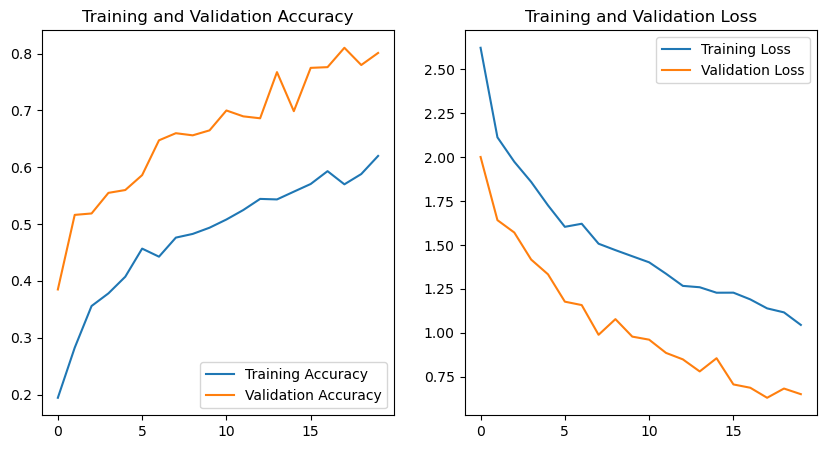

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths
train_dir = 'E:\\web'
validation_dir = 'E:\\web'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=16,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150, 150),
                                                              batch_size=16,
                                                              class_mode='categorical')

# Load the VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pretrained layers for feature extraction
vgg_base.trainable = False

# Define the new model
model = models.Sequential([
    vgg_base,  # Pretrained model as the base
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # To reduce overfitting
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50)

# Plot training & validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
model.save('const_model.h5')


In [22]:
from tensorflow.keras.models import load_model

model = load_model('const_model.h5')


In [24]:
import cv2
import numpy as np

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (150, 150))  # Resize to the target size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match input shape
    return image

In [30]:
# Path to the test image
test_image_path = 'E:\\web\\augmented_images_crux\\8.jpeg'
# Preprocess the image
test_image = preprocess_image(test_image_path)

# Make a prediction
prediction = model.predict(test_image)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction, axis=1)
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: [8]


In [32]:
# Assuming you have this dictionary from your training data
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

# Print the predicted label
predicted_label = class_labels[predicted_class[0]]
print("Predicted Constellation:", predicted_label)


Predicted Constellation: augmented_images_crux


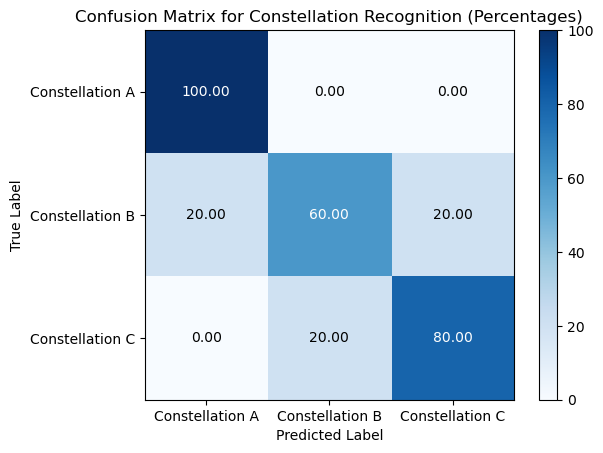

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predicted labels
# Replace these with your actual labels
true_labels = [0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2]
predicted_labels = [0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2]

# Define the class names (constellations)
class_names = ['Constellation A', 'Constellation B', 'Constellation C']

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2])

# Convert counts to percentages
cm_percentages = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create the confusion matrix display with percentages
fig, ax = plt.subplots()
im = ax.imshow(cm_percentages, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix for Constellation Recognition (Percentages)',
       ylabel='True Label',
       xlabel='Predicted Label')

# Loop over data dimensions and create text annotations
fmt = '.2f'  # Format for the percentage
thresh = cm_percentages.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm_percentages[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_percentages[i, j] > thresh else "black")

plt.show()
